In [1]:
from stochastic_damped_harmonic_oscillator import *
import numpy as np
import matplotlib.pyplot as plt

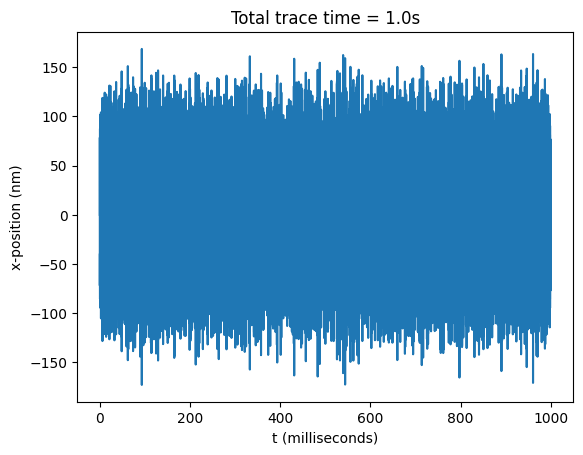

len(x)=10000000


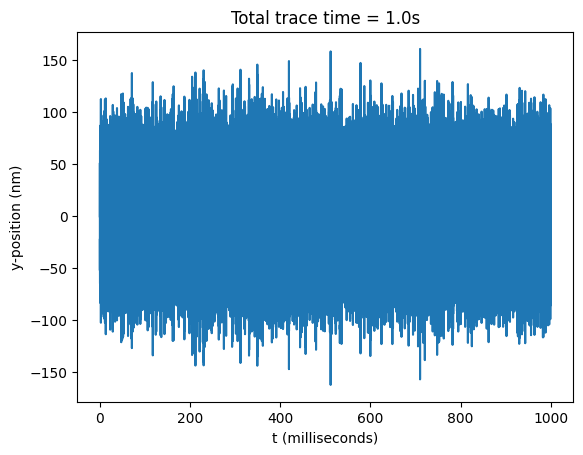

len(x)=10000000


In [13]:
num_samples = 1e7
time_step = 1e-7
noise_angle = 45

data = np.loadtxt('xtrace.dat')
t, x, v = data[:, 0], data[:, 1], data[:, 2]
x_trace = TimeTrace(Physics(), 1, 1)
x_trace.num_samples, x_trace.Δt = num_samples, time_step
x_trace.time_array, x_trace.displacement, x_trace.velocity = t, x, v
x_trace.noise.angle = noise_angle * degrees
x_trace.plot_displacement()
print(f'{len(x)=}')

data = np.loadtxt('ytrace.dat')
t, x, v = data[:, 0], data[:, 1], data[:, 2]
y_trace = TimeTrace(Physics(), 1, 1)
y_trace.axis = 'y'
y_trace.num_samples, y_trace.Δt = num_samples, time_step
y_trace.time_array, y_trace.displacement, y_trace.velocity = t, x, v
y_trace.noise.angle = noise_angle * degrees
y_trace.plot_displacement()
print(f'{len(x)=}')

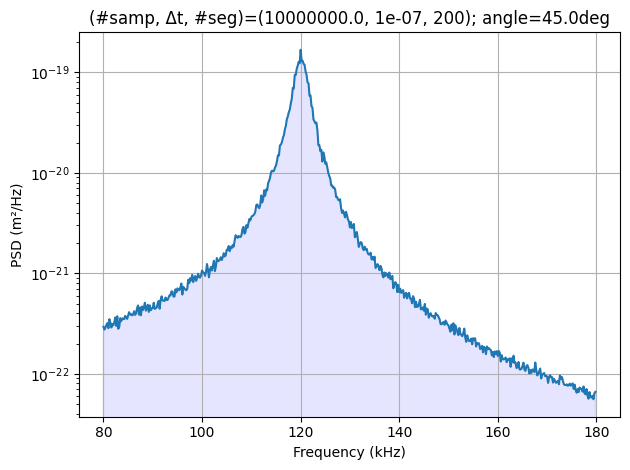

x_psd.temperature=150.10865997250994K


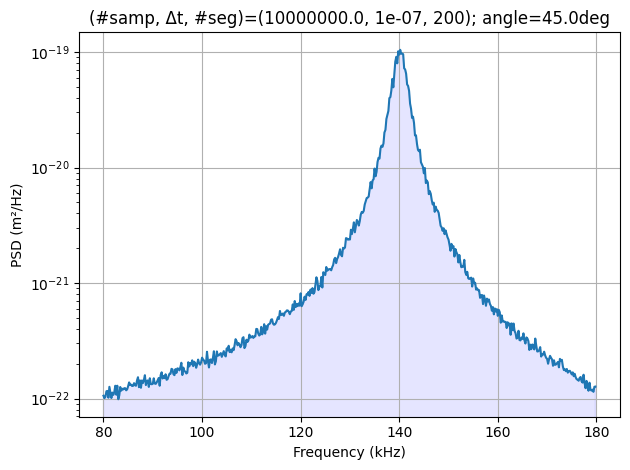

y_psd.temperature=109.62465290444793K


In [15]:
num_segments = 200
x_psd = SpectralDensityEstimate(x_trace, num_segments=num_segments)
x_psd.plot_vs_kHz(80, 180, semilogy=True)
print(f'{x_psd.temperature=}K')

num_segments = 200
y_psd = SpectralDensityEstimate(y_trace, num_segments=num_segments)
y_psd.plot_vs_kHz(80, 180, semilogy=True)
print(f'{y_psd.temperature=}K')


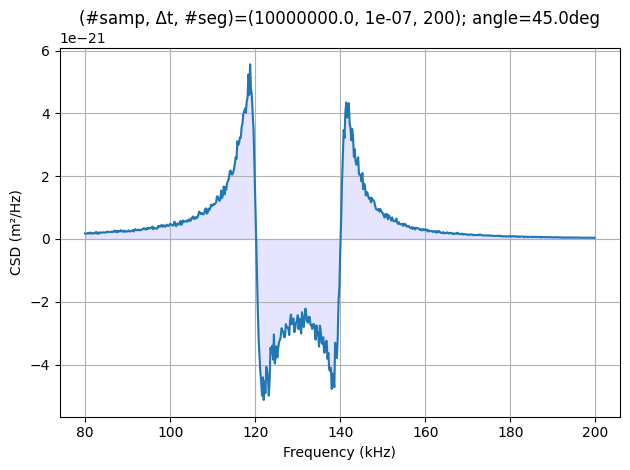

In [16]:
xy_traces = x_trace, y_trace
num_segments = 200
csd = SpectralDensityEstimate(*xy_traces, num_segments=num_segments)
csd.plot_vs_kHz(80, 200, semilogy=False)

In [65]:
num_samples = 1e7
time_step = 1e-7

time_array = np.loadtxt('output/time_array.dat')

all_xy_pairs = []
lower_kHz, upper_kHz = 100, 160
for angle in range(0, 181, 1):
    data = np.loadtxt(f'output/angle_{angle}/xtrace.dat')
    x_trace = TimeTrace(Physics(), 1, 1)
    x_trace.num_samples, x_trace.Δt = num_samples, time_step
    x_trace.time_array = time_array
    x_trace.displacement = data
    x_trace.noise.angle = angle * degrees

    data = np.loadtxt(f'output/angle_{angle}/ytrace.dat')
    y_trace = TimeTrace(Physics(), 1, 1)
    y_trace.axis = 'y'
    y_trace.num_samples, y_trace.Δt = num_samples, time_step
    y_trace.time_array = time_array
    y_trace.displacement = data
    y_trace.noise.angle = angle * degrees

    xy = x_trace, y_trace
    all_xy_pairs.append(xy)

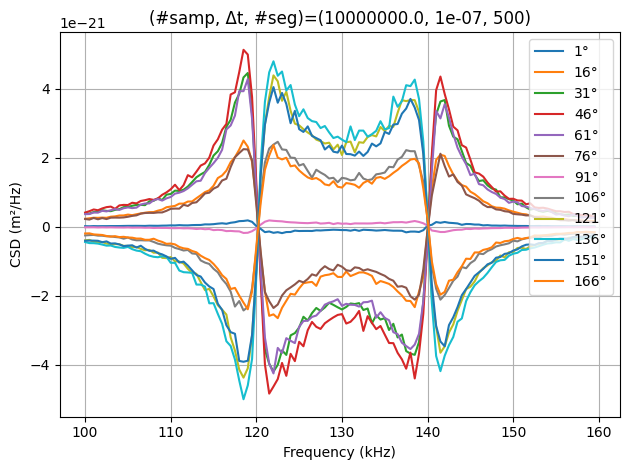

In [69]:
imaginary_CSD = False
num_segments = 500

for xy in all_xy_pairs[1:-1:15]:
    csd = SpectralDensityEstimate(*xy, num_segments=num_segments, imaginary_CSD=imaginary_CSD)
    x_points, y_points = csd.get_kHz_plot_points(lower_kHz, upper_kHz)

    plt.plot(x_points, y_points, label=f'{csd.trace.noise.angle / degrees:.0f}°')
    plt.grid('both')
    plt.title(
        f'(#samp, Δt, #seg)={csd.trace.num_samples, csd.trace.Δt, csd.num_segments}'
    )
    plt.xlabel('Frequency (kHz)')
    plt.ylabel('CSD (m²/Hz)')
    plt.tight_layout()
    plt.legend(loc='upper right')

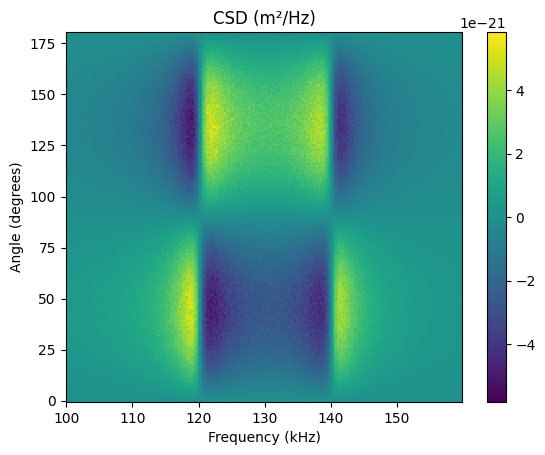

In [68]:
num_segment = 200
imaginary_CSD = False
csds = [SpectralDensityEstimate(*xy, num_segments=num_segments, imaginary_CSD=imaginary_CSD) for xy in all_xy_pairs]
# x
csd_freqs = csds[0].get_kHz_plot_points(lower_kHz, upper_kHz)[0]
# y
csd_angles_degrees = np.array([csd.trace.noise.angle for csd in csds]) / degrees
# z
csd_vals = np.array([csd.get_kHz_plot_points(lower_kHz, upper_kHz)[1] for csd in csds])

x, y = csd_freqs, csd_angles_degrees
intensity = csd_vals
plot_heatmap(x, y, intensity)